In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
wine = pd.read_csv('E://Data Science//DataSciecePractise//Sapient//Case_Onsite_Modeling_Wine//wine_dataset.csv')

## Finding missing values in dataset

In [3]:
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [4]:
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

## EDA

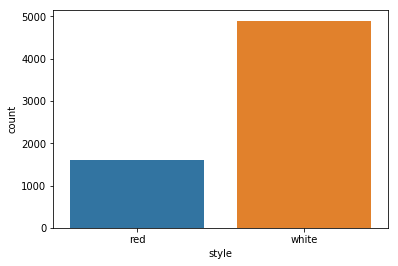

In [6]:
sns.countplot(wine['style'])

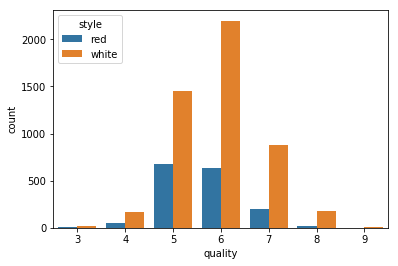

In [7]:
sns.countplot(wine['quality'],hue = wine['style'])

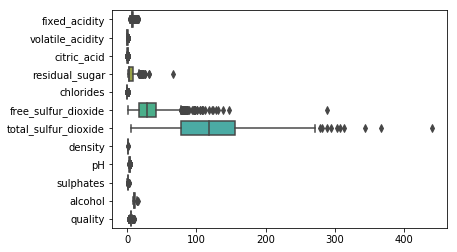

In [12]:
temp = [x for x in wine.columns if x not in ['style']]
sns.boxplot(data = wine[temp], orient="h")

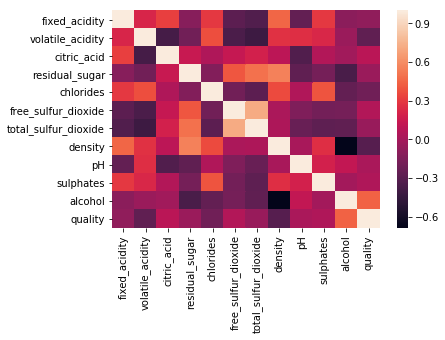

In [14]:
corr = wine[temp].corr()
sns.heatmap(corr)

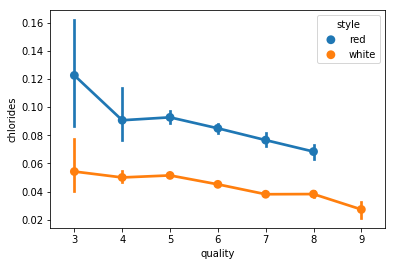

In [15]:
sns.pointplot(x="quality",y="chlorides",hue="style",data = wine)

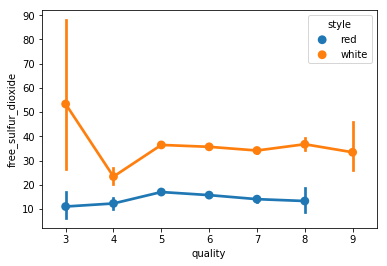

In [16]:

sns.pointplot(x="quality",y="free_sulfur_dioxide",hue="style",data = wine)

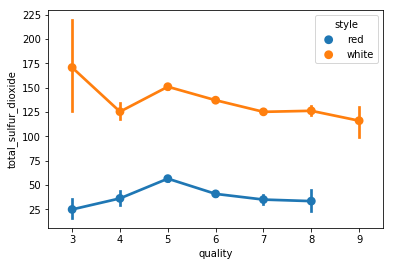

In [17]:
sns.pointplot(x="quality",y="total_sulfur_dioxide",hue="style",data = wine)

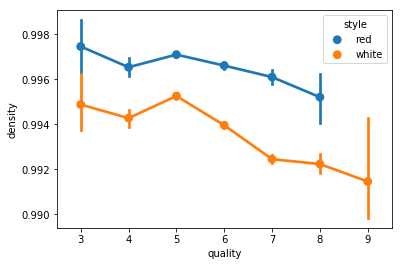

In [18]:
sns.pointplot(x="quality",y="density",hue="style",data = wine)

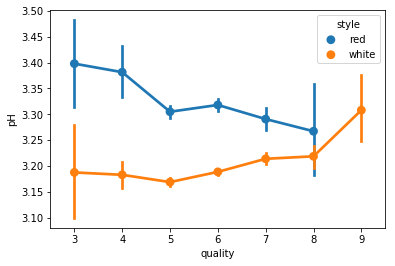

In [19]:
sns.pointplot(x="quality",y="pH",hue="style",data = wine)

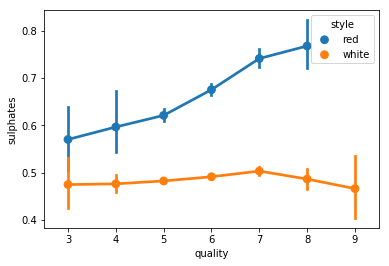

In [20]:

sns.pointplot(x="quality",y="sulphates",hue="style",data = wine)

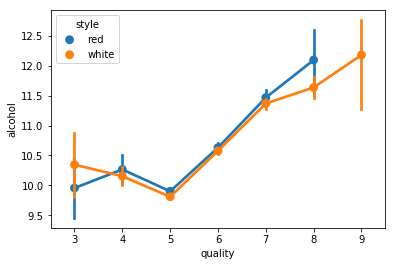

In [21]:
sns.pointplot(x="quality",y="alcohol",hue="style",data = wine)

## converting style datatype to int

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine['style'] = le.fit_transform(wine['style'])

## checking the imbalance of dataset

In [5]:
wine['style'].value_counts(normalize = True)

white    4898
red      1599
Name: style, dtype: int64

## Modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [6]:
def data_sampling(X, y, method = 'smote', kind = 'regular', seed = 0):
    if method == 'smote':
        sm = SMOTE(kind = kind)
        X_res, y_res = sm.fit_sample(X, y)
    
    return {'X' : X_res, 'y' : y_res}

In [9]:
feature_names = [x for x in wine.columns if x not in ['style']]
target = wine['style']

In [10]:
X = wine[feature_names].values
y = wine['style'].values

In [11]:
X_train, X_valid, y_train, y_valid=  train_test_split(X,y,train_size = 0.7,stratify = y,random_state = 0)

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## applying smote on data

In [12]:
smote = data_sampling(X_train, y_train, method = 'smote')
X_SMOTE_train = smote['X']
y_SMOTE_train = smote['y']

In [15]:
pd.DataFrame({'target' : y_SMOTE_train})['target'].value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

## Logistic Regression

In [44]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_SMOTE_train, y_SMOTE_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
f1_score(y_valid, lr.predict(X_valid))

0.9866209262435678

## kfold cross validation

In [47]:
f1 = cross_val_score(lr,X_SMOTE_train, y_SMOTE_train, cv=3, scoring='f1')

In [48]:
f1

array([0.97150373, 0.98601399, 0.98030635])

## Decission Tree

In [92]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_SMOTE_train, y_SMOTE_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [93]:
f1_score(y_valid, clf.predict(X_valid))

0.9877467665078286

## grid search with cross validation

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth' :[5,10,15,20]}]
grid_search = GridSearchCV(clf,param_grid = parameters,scoring = 'f1',cv = 3,n_jobs = -1)

In [52]:
grid_search = grid_search.fit(X_SMOTE_train, y_SMOTE_train)

In [53]:
grid_search.best_score_

0.9887692782409007

In [54]:
grid_search.best_params_

{'max_depth': 10}

## Random Forest

In [94]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_SMOTE_train, y_SMOTE_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
f1_score(y_valid, rf.predict(X_valid))

0.9942196531791907

## grid search with cross validation

In [56]:
parameters = [{'max_depth' :[5,10,15,20] , 'max_features':[3,4,5,6]}]
grid_search = GridSearchCV(rf,param_grid = parameters,scoring = 'f1',cv = 3,n_jobs = -1)

In [57]:
grid_search = grid_search.fit(X_SMOTE_train, y_SMOTE_train)

In [69]:
grid_search.best_score_

0.9951893099026833

In [59]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 4}

## xgboost

In [96]:
xgb = XGBClassifier(random_state = 0, n_estimators=50)
xgb.fit(X_SMOTE_train, y_SMOTE_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,xgb.predict(X_valid))

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[ 472,    8],
       [   8, 1462]], dtype=int64)

In [98]:
f1_score(y_valid, xgb.predict(X_valid))

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9945578231292517

## grid search with cross validation

In [112]:
parameters = [{'max_depth' :[5,10,15,20] , 'n_estimators':[50,100,200,500]}]
grid_search = GridSearchCV(xgb,param_grid = parameters,scoring = 'f1',cv = 3,n_jobs = -1)

In [113]:
grid_search = grid_search.fit(X_SMOTE_train, y_SMOTE_train)

In [114]:
grid_search.best_score_

0.9962130517425446

In [115]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [104]:
xgb.feature_importances_

array([0.0545977 , 0.11781609, 0.00574713, 0.0316092 , 0.1724138 ,
       0.00574713, 0.25574714, 0.08045977, 0.10632184, 0.12068965,
       0.04885057, 0.        ], dtype=float32)

In [105]:
pd.DataFrame()
pd.DataFrame({'colname' : wine[temp].columns,'importance' : xgb.feature_importances_})

,colname,importance
0,fixed_acidity,0.054598
1,volatile_acidity,0.117816
2,citric_acid,0.005747
3,residual_sugar,0.031609
4,chlorides,0.172414
5,free_sulfur_dioxide,0.005747
6,total_sulfur_dioxide,0.255747
7,density,0.080460
8,pH,0.106322
9,sulphates,0.120690


## applying parameters obtained form gridsearch to model

In [116]:
xgb = XGBClassifier(random_state = 0, max_depth = 5,n_estimators=500)
xgb.fit(X_SMOTE_train, y_SMOTE_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [117]:
f1_score(y_valid, xgb.predict(X_valid))

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9959211420802174